In [38]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from anndata import AnnData
import squidpy as sq
import scanpy as sc
from cellpose import models, io
import matplotlib.pyplot as plt
from modest_image import ModestImage, imshow
from skimage.restoration import inpaint
#%matplotlib widget
import cv2
import torch
from skimage import io, morphology
import skimage.feature as features
from scipy import ndimage
import time
from tqdm.notebook import tqdm
import scipy
import seaborn as sns
import pybasic


import skimage
from skimage.measure import regionprops, regionprops_table, approximate_polygon
from shapely.geometry import Polygon
from shapely.geometry.polygon import LinearRing
import geopandas
import scanpy as sc
import rasterio
from rasterio import features
import shapely
from shapely.geometry import Point, Polygon
import matplotlib
from matplotlib.colors import Normalize

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [119]:
import script_plants as pl

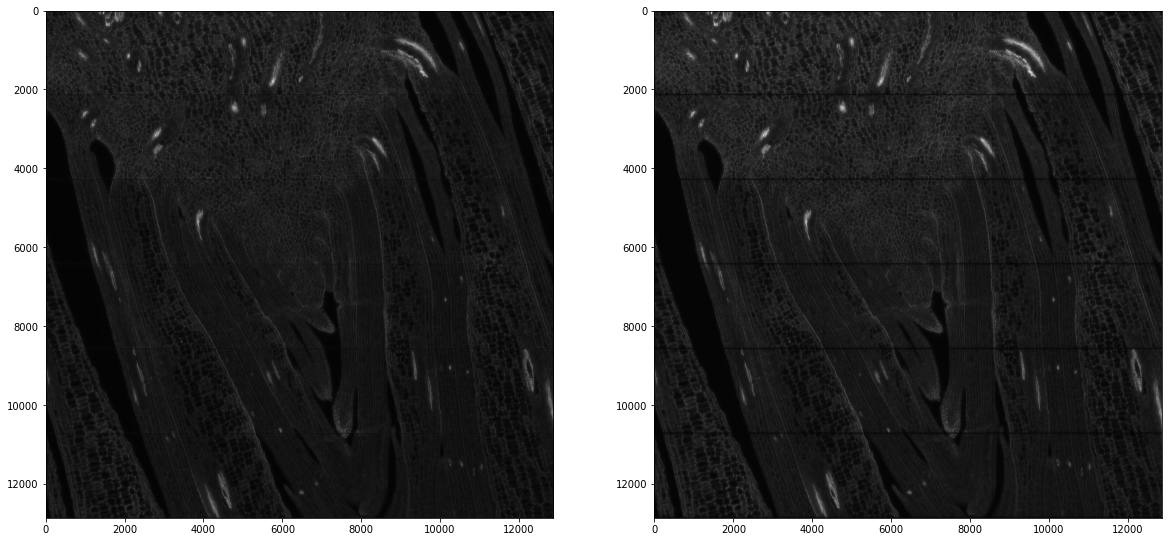

In [40]:
path_image="/srv/scratch/lottep/data/PSB/Resolve data/Hormone dataset/pla1 section (mutant)/C1-2_CalcoF.tiff"
I = io.imread(path_image)
wall=pl.BasiCCorrection(I=I)

158.88152146339417


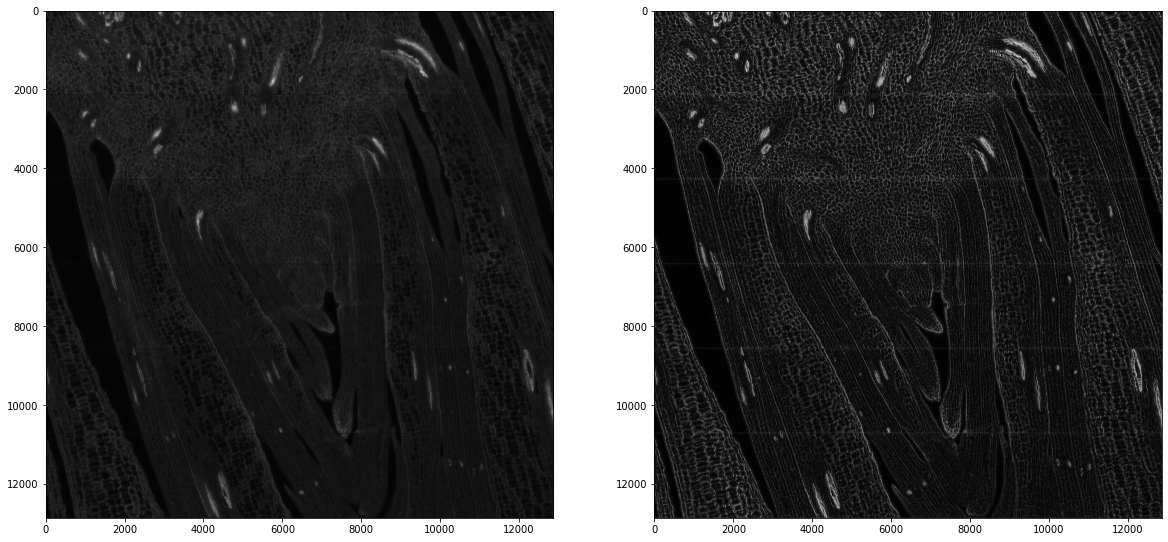

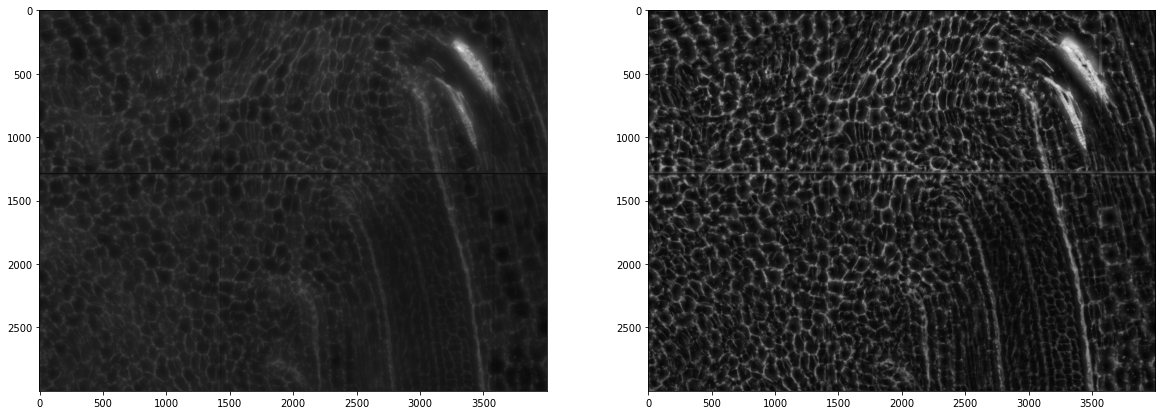

In [41]:
crd=[3000,6000,5000,9000]
IWall=pl.preprocessImage(I=wall,size_tophat=50,small_size_vis=crd,contrast_clip=6.5)

In [128]:
Masks=pl.segmentation(np.invert(IWall),device='cuda:4',mask_threshold=-4,flow_threshold=0.9,diameter=70,model_type='cyto',small_size_vis=crd)

2022-08-05 13:11:16,911 [INFO] ** TORCH CUDA version installed and working. **
2022-08-05 13:11:16,912 [INFO] >>>> using GPU
4
2022-08-05 13:11:17,026 [INFO] ~~~ FINDING MASKS ~~~


/srv/scratch/lottep/anaconda3/envs/try/lib/python3.8/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


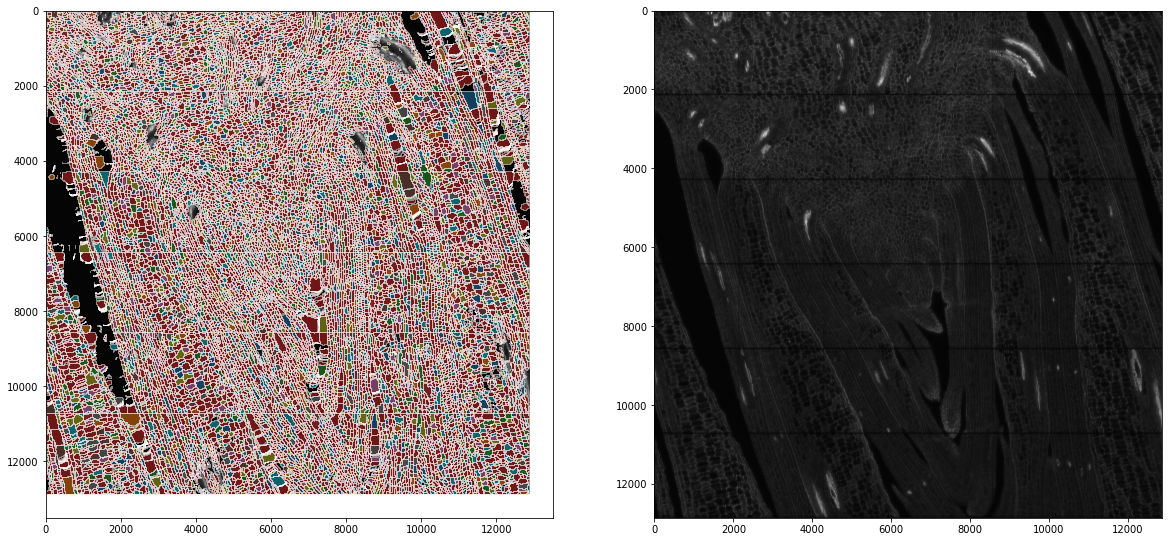

In [106]:
path_transcripts="/srv/scratch/lottep/data/PSB/Resolve data/Hormone dataset/pla1 section (mutant)/C1-2_results.txt"
adata=pl.create_adata_quick(path_transcripts,I,Masks)

/srv/scratch/lottep/anaconda3/envs/try/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


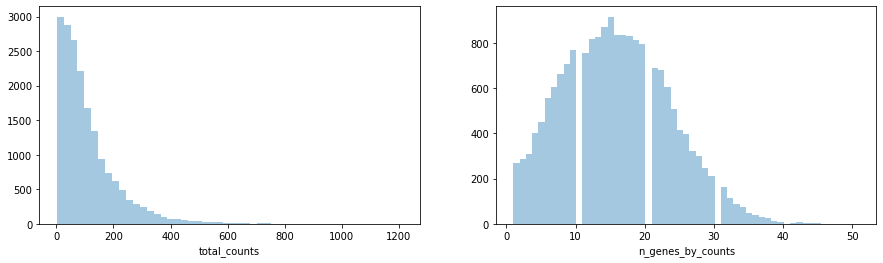

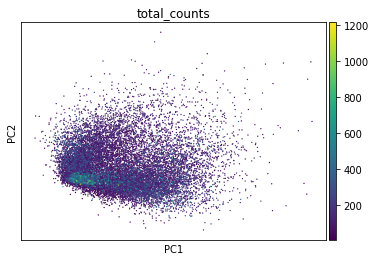

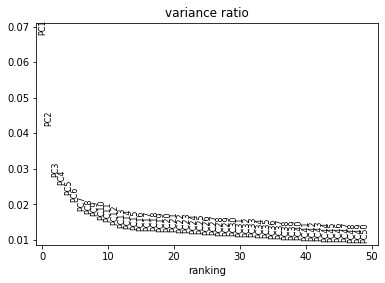

AnnData object with n_obs × n_vars = 17215 × 98
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_2_genes', 'pct_counts_in_top_5_genes', 'n_counts', 'nucleusSize'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'mean', 'std'
    uns: 'spatial', 'log1p', 'pca'
    obsm: 'spatial', 'polygons', 'X_pca'
    varm: 'PCs'

In [107]:
pl.preprocessAdata(adata,Masks)

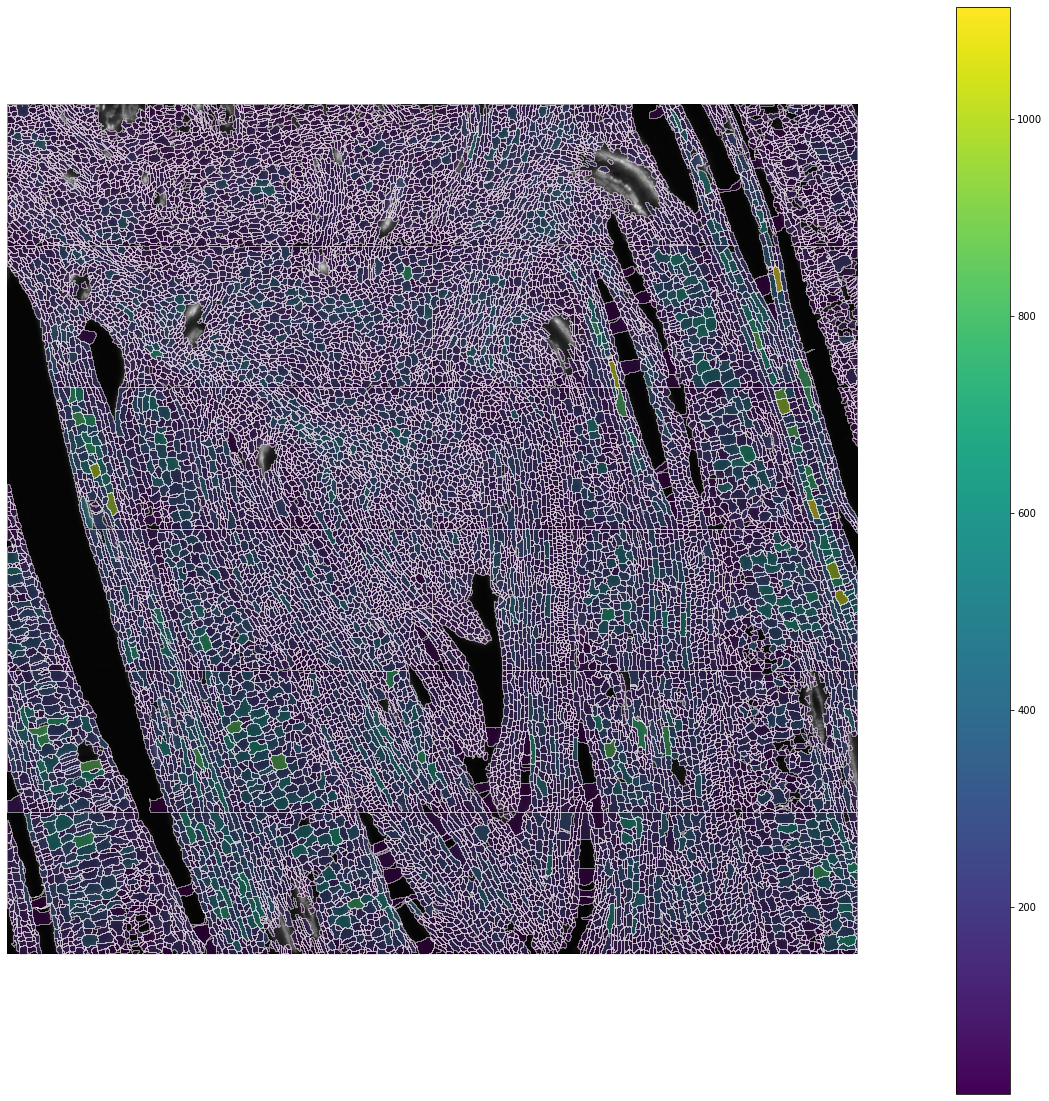

In [114]:
pl.plot_shapes(adata,column='total_counts')

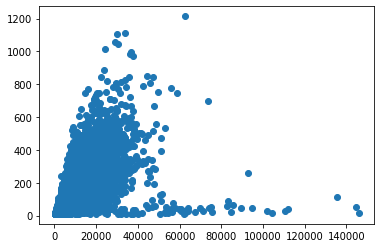

In [112]:
plt.scatter(adata.obs['nucleusSize'],adata.obs['total_counts'])
plt.title=('cellsize vs cellcount')

In [113]:
adata=adata[adata.obs['nucleusSize']<60000,:]
adata=adata[adata.obs['nucleusSize']>500,:]
adata.obsm['polygons']=geopandas.GeoDataFrame(adata.obsm['polygons'],geometry=adata.obsm['polygons'].geometry)


In [ ]:
adata.obsm['polygons']["X"] = adata.obsm['polygons'].centroid.x
adata.obsm['polygons']["Y"] = adata.obsm['polygons'].centroid.y

